In [1]:
import warnings

def fxn():
    warnings.warn("FutureWarning", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
# clf_name = "<clf_name>"
clf_name = 'GMM_basic'

In [8]:
import os
import dotenv
import sys
import pandas as pd
import numpy as np

from IPython.display import Markdown as md

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from collections import Counter

from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn import preprocessing, svm  # noqa
from sklearn.datasets import make_classification  # noqa
from sklearn.metrics import (accuracy_score, classification_report,  # noqa
                             confusion_matrix, f1_score, make_scorer,
                             precision_recall_fscore_support)
from sklearn.mixture import GaussianMixture as GMM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder  # noqa
from sklearn.externals import joblib

project_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))  # might be __file__
# project_dir = os.path.dirname(os.path.abspath(''))  # might be __file__

print(project_dir)
sys.path.insert(0, os.path.join(project_dir, 'src'))
from utils.utilities import nzvKJ, plot_confusionmatrix, emotion_codes  # noqa

from features.custom_transformers import (ColumnExtractor, DateDiffer, # noqa
                                          DateFormatter, DFFeatureUnion,
                                          DFImputer, DFRobustScaler,
                                          DummyTransformer, Log1pTransformer,
                                          MultiEncoder, ZeroFillTransformer)


from models.train_model import get_data



/media/win-d/myfiles/2019/emodb-classifier


In [4]:
np.set_printoptions(precision=2)

df, df_train, df_test, y_train, y_test = get_data()

model_dir = os.path.join(project_dir, 'models')

print('loading canned classifier')
clf_fname = os.path.join(model_dir, 'clf_'+clf_name+'.pkl')
print('classifier: ', clf_fname)
clf = joblib.load(clf_fname)

pipeline_fname = os.path.join(model_dir, 'prepro_pipeline_'+clf_name+'.pkl')
print('pipeline: ', pipeline_fname)
pipeline = joblib.load(pipeline_fname)

#label_enc_fname = os.path.join(model_dir, 'label_encoder_'+clf_name+'.pkl')
#print('y encoder: ', label_enc_fname)
#label_encoder = joblib.load(label_enc_fname)

# pickling not working!!
label_encoder = LabelEncoder()
label_encoder.fit(np.array(y_train.values))
y_train_t = label_encoder.fit_transform(np.array(y_train.values))
y_test_enc = label_encoder.fit_transform(y_test)

X_test_t = pipeline.transform(df_test)
y_pred = clf.predict(X_test_t)

# print(classification_report(y_test_enc, y_pred))

label2emocode = dict(zip([x for x in range(len(label_encoder.classes_))], label_encoder.classes_))
label2emotions = dict()
for k, v in label2emocode.items():
    label2emotions[str(k)] = emotion_codes()[v]



labels = [emotion_codes()[x] for x in label_encoder.classes_]


loading canned classifier
classifier:  /media/win-d/myfiles/2019/emodb-classifier/models/clf_GMM_basic.pkl
pipeline:  /media/win-d/myfiles/2019/emodb-classifier/models/prepro_pipeline_GMM_basic.pkl


/home/christian/.venvs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/christian/.venvs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
clf_report = classification_report(y_test_enc, y_pred,
                               output_dict=True,
                               target_names=label2emotions.values())

df_report = pd.DataFrame(clf_report)

/home/christian/.venvs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
md("**Classifier: %s**"%(clf_name))

**Classifier: GMM_basic**

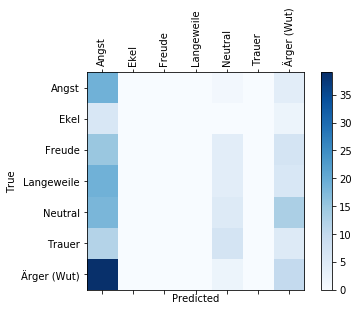

In [6]:
plot_confusionmatrix(clf, y_test_enc, y_pred, labels, cmap=plt.cm.Blues)

In [7]:
df_emotions = df_report[list(label2emotions.values())]
df_emotions.style.set_precision(2)

,Angst,Ekel,Freude,Langeweile,Neutral,Trauer,Ärger (Wut)
f1-score,0.25,0,0,0,0.17,0,0.2
precision,0.15,0,0,0,0.22,0,0.21
recall,0.79,0,0,0,0.14,0,0.2
support,24,8,26,29,36,24,51
